In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv("NCVS_Select_-_Personal_Victimization.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           63465 non-null  object 
 1   yearq           63465 non-null  float64
 2   year            63465 non-null  int64  
 3   ager            63465 non-null  int64  
 4   sex             63465 non-null  int64  
 5   hispanic        63465 non-null  int64  
 6   race            63465 non-null  int64  
 7   race_ethnicity  63465 non-null  int64  
 8   hincome1        63465 non-null  int64  
 9   hincome2        63465 non-null  int64  
 10  marital         63465 non-null  int64  
 11  popsize         63465 non-null  int64  
 12  region          63465 non-null  int64  
 13  msa             63465 non-null  int64  
 14  locality        63465 non-null  int64  
 15  educatn1        63465 non-null  int64  
 16  educatn2        63465 non-null  int64  
 17  veteran         63465 non-null 

In [5]:
df['year']

0        2004
1        2009
2        2004
3        2011
4        2004
         ... 
63460    2021
63461    2021
63462    2021
63463    2021
63464    2021
Name: year, Length: 63465, dtype: int64

In [6]:
df = df.drop(columns=(['idper']))

<Axes: title={'center': 'Cases by Year'}, xlabel='year', ylabel='count'>

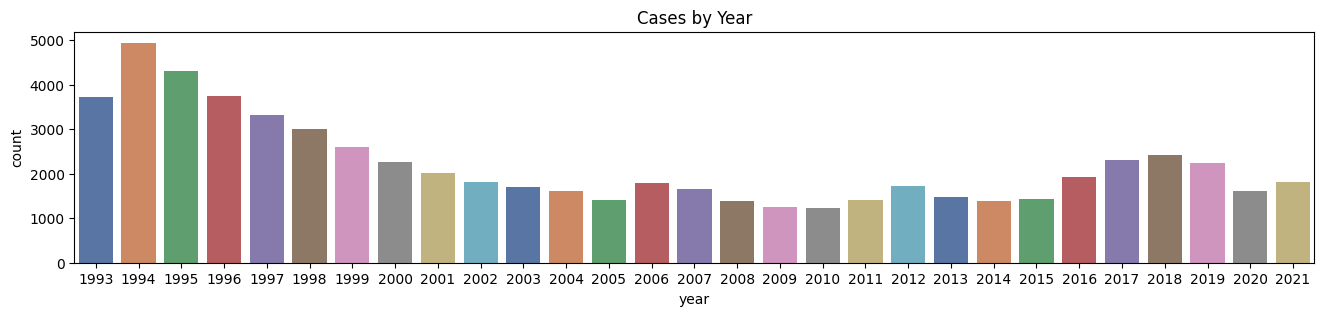

In [7]:
plt.figure(figsize=(16,3))
plt.title('Cases by Year')
sns.countplot(data=df,x='year',palette='deep')

In [8]:
quarters = []
for year in df['yearq']:
    try:
        quarter = str(year).split('.')[1]
    except IndexError:
        quarter = 'Invalid'
    quarters.append(quarter)

df['quarter'] = quarters

<Axes: xlabel='yearq', ylabel='count'>

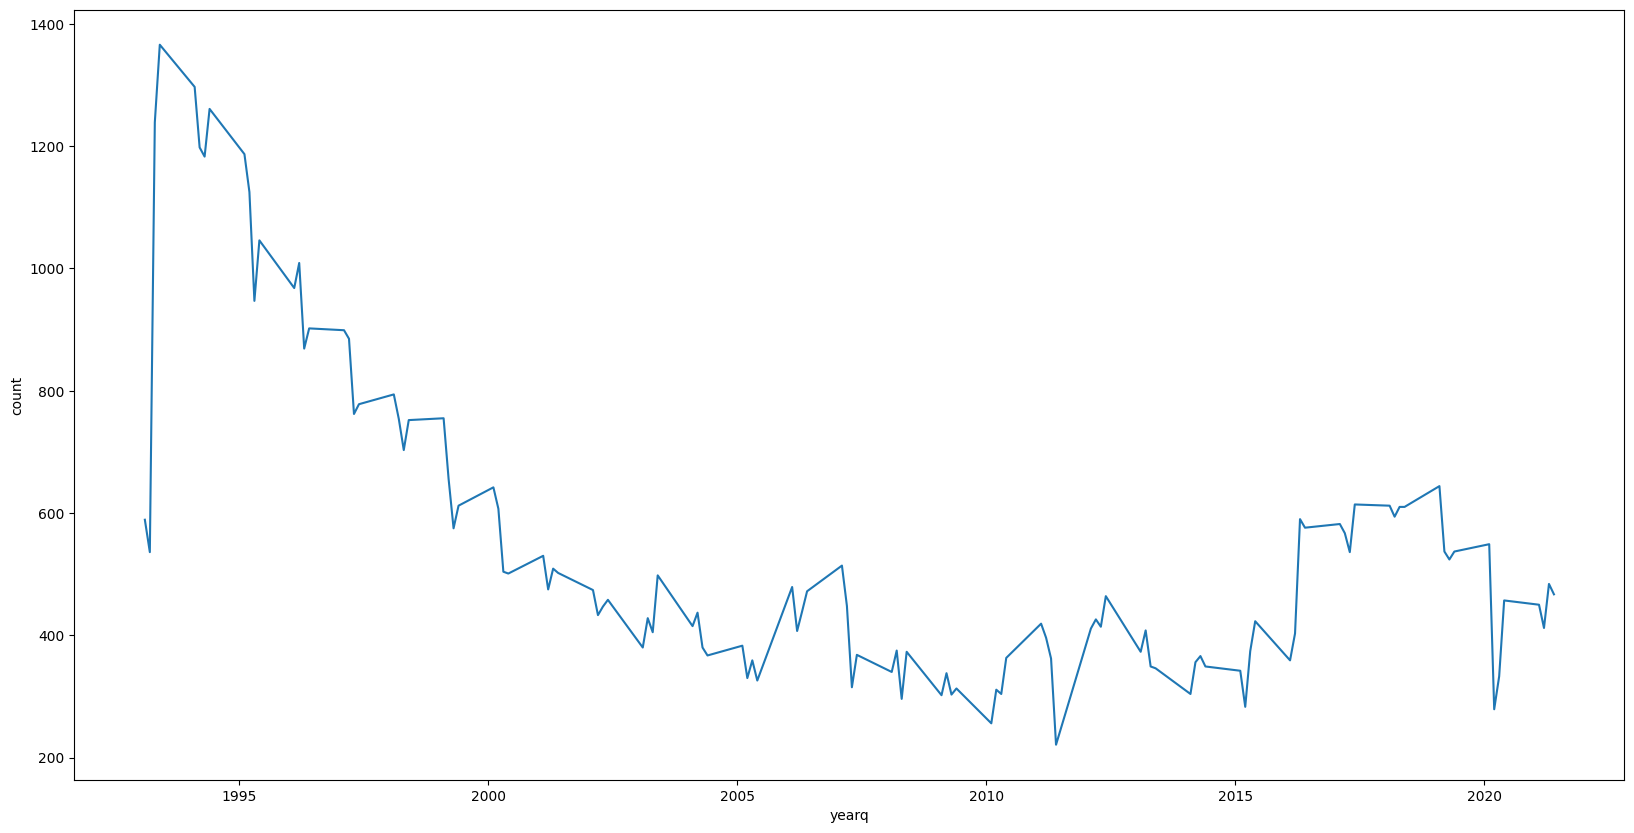

In [9]:
time_df = df['yearq'].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(data=time_df, x='yearq', y='count')


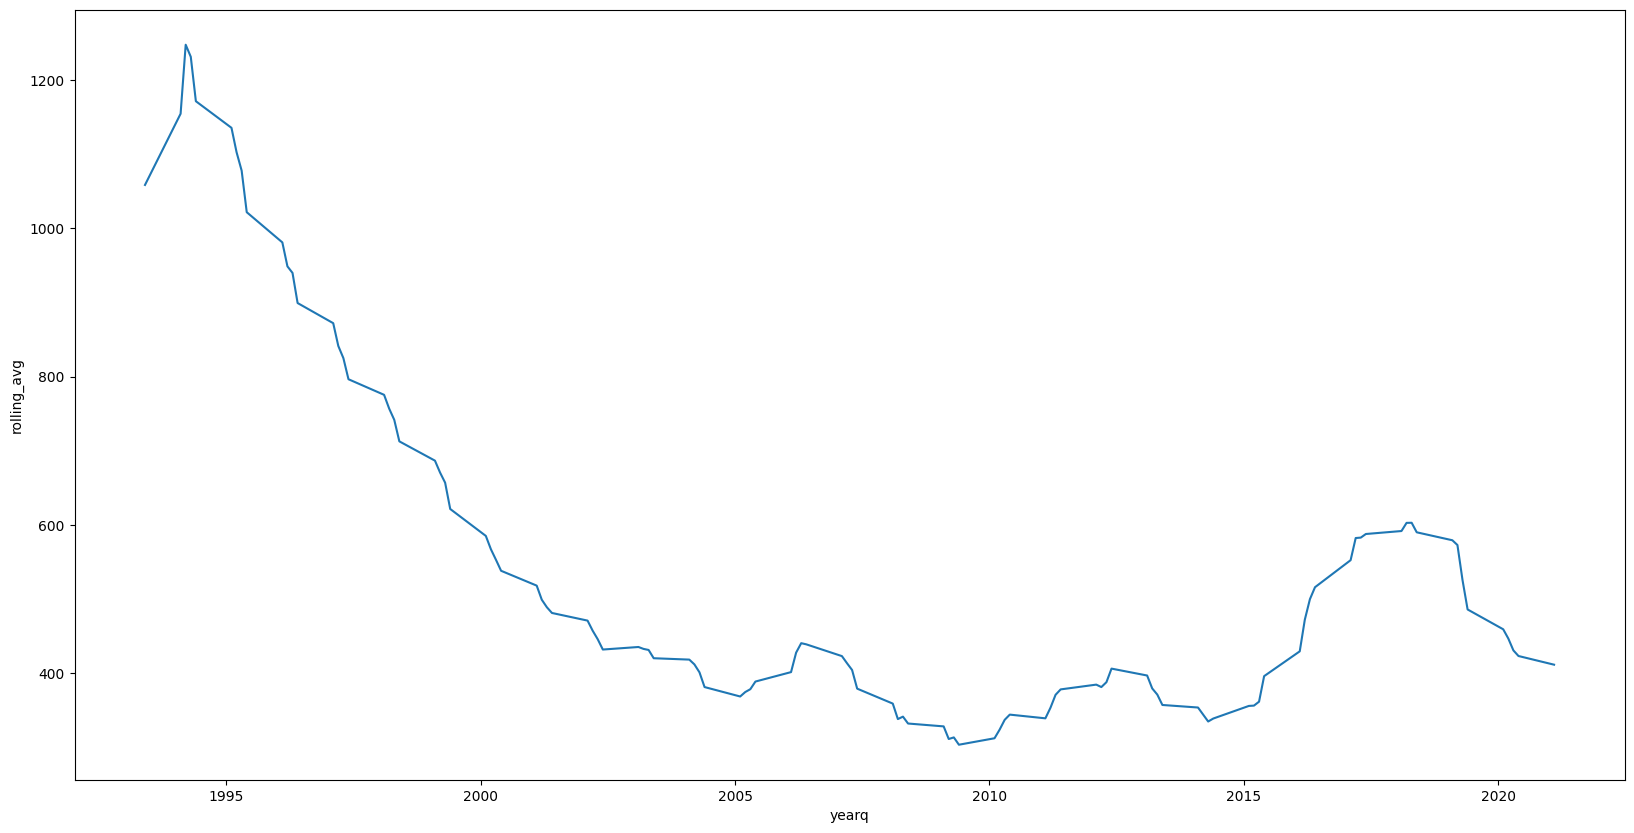

In [20]:

time_df = df['yearq'].value_counts().reset_index()
time_df = time_df.sort_values(by='yearq')  # Sort the dataframe by the 'index' column (yearq) for plotting

# Calculate rolling average with a window size of 3 (adjust as needed)
time_df['rolling_avg'] = time_df['count'].rolling(window=7, center=True).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(data=time_df, x='yearq', y='rolling_avg')
plt.show()

<Axes: title={'center': 'Cases by Year, (Quarters)'}, xlabel='year', ylabel='count'>

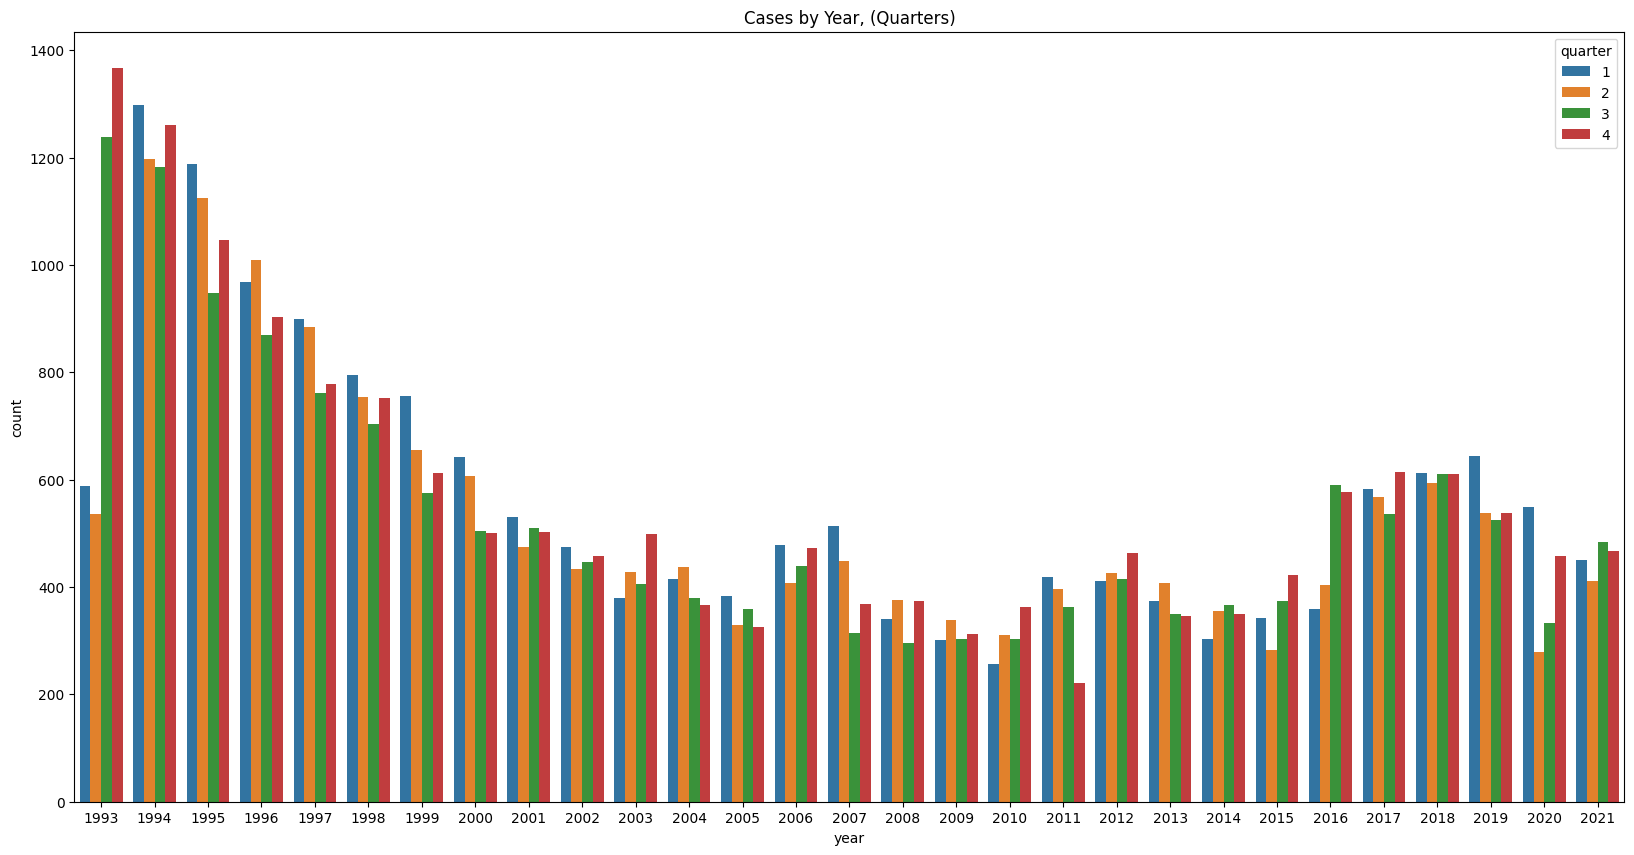

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Cases by Year, (Quarters)')
sns.countplot(x=df['year'],hue=df['quarter'],hue_order=['1','2','3','4'])

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

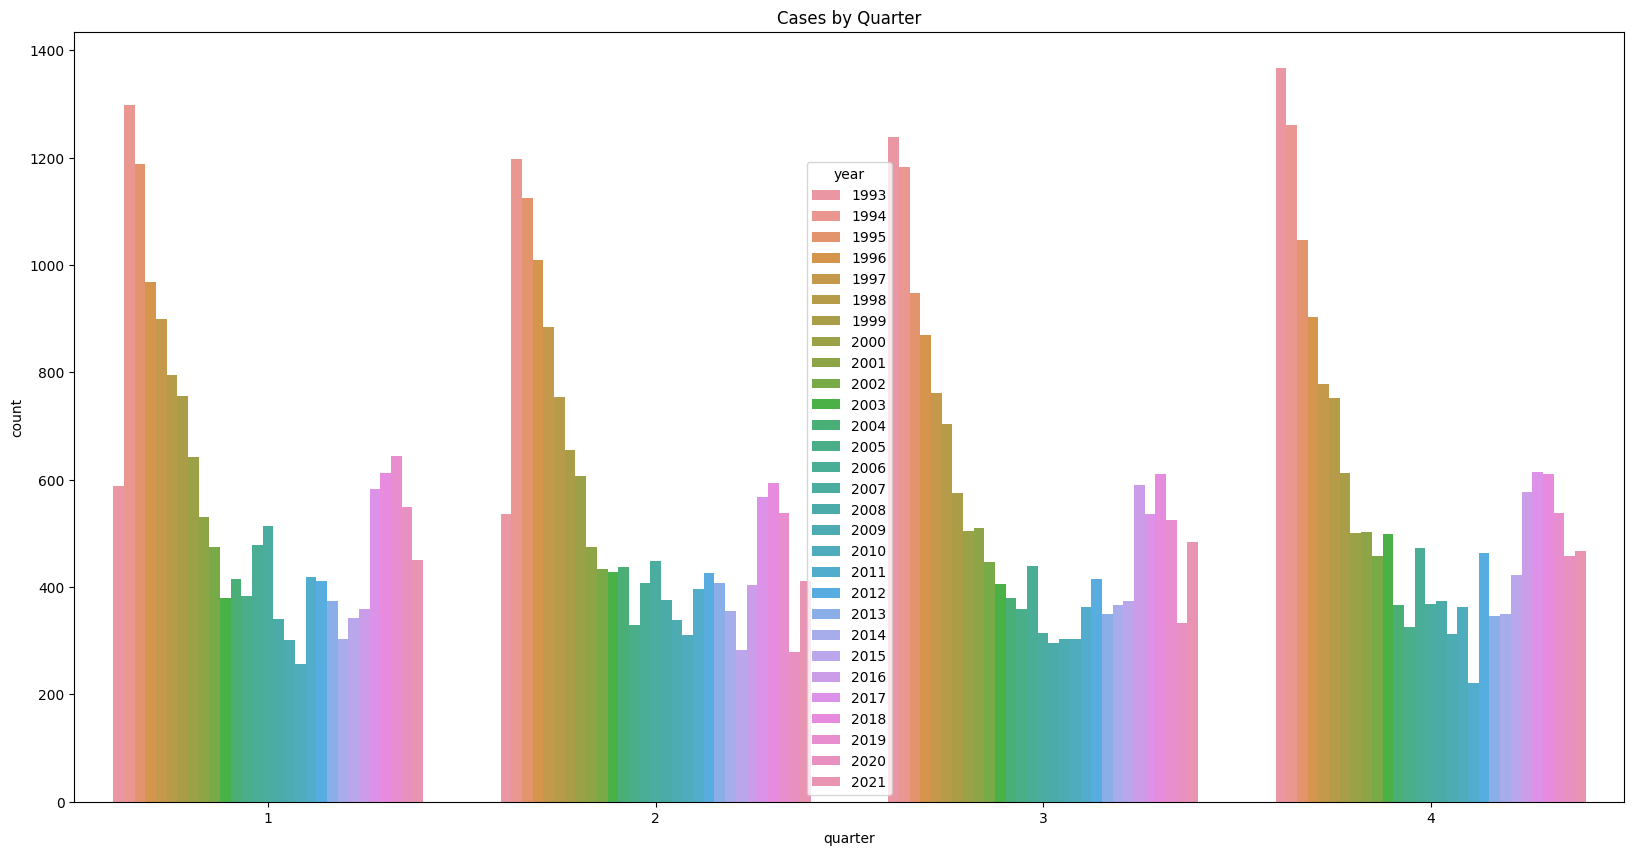

In [24]:

plt.figure(figsize=(20,10))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values(),hue=df['year'])

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

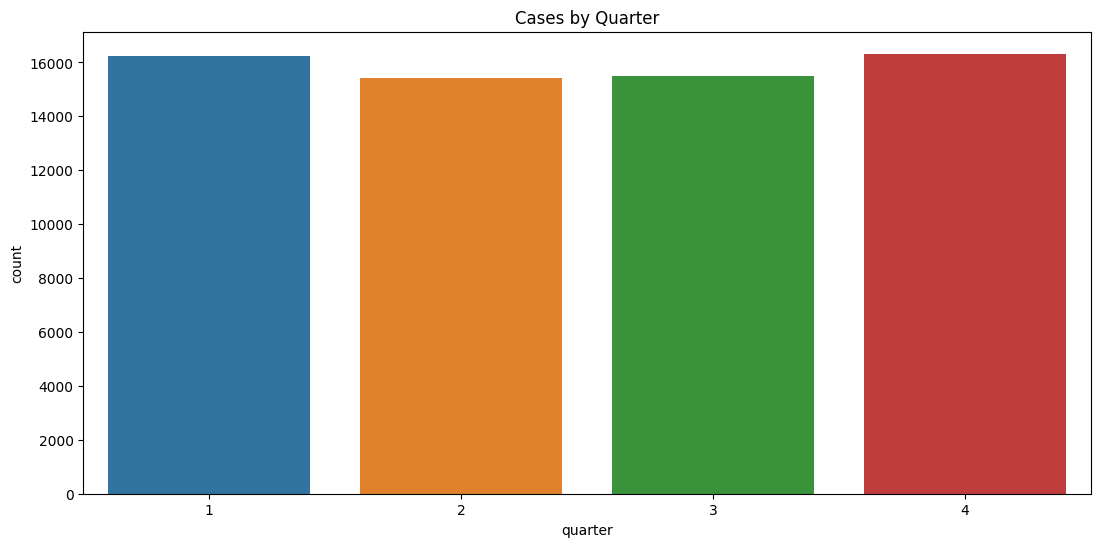

In [29]:
plt.figure(figsize=(13,6))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values())

In [34]:
from statsmodels.tsa.seasonal import STL

# Perform time series decomposition
decomposition = STL(time_df['rolling_avg'], seasonal=12)
result = decomposition.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid

ValueError: Unable to determine period from endog